In [1]:
import gym
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
class PID:
    def __init__(self, kp: float, ki: float, kd: float, set_point=np.array([0.0])):
        self.kp, self.ki, self.kd = kp, ki, kd
        self.set_point = set_point
        self.integral, self.last_error = None, None

    def reset(self):
        self.integral = 0.0
        self.last_error = 0.0

    def action(self, feedback):
        error = self.set_point - feedback

        proportional = self.kp * error
        self.integral += self.ki * error
        derivative = self.kd * (error - self.last_error)
        self.last_error = error

        output = proportional + self.integral + derivative
    
        return output, {'proportional':proportional,'derivative':derivative}

In [119]:

class PendulumEnv:
    """ Wrapper over the original gym pendulum environment with following changes:
    
        1. Obs: theta(angle)
        2. Max. Torque : 10
    """

    def __init__(self):
        self.env = gym.make('Pendulum-v0')
        self.env.unwrapped.max_torque = 10

    def seed(self, *args, **kwargs):
        self.env.seed(*args, **kwargs)

    def reset(self):
        self.env.reset()
        return self._get_obs()

    def step(self, action, **kwargs):
        _, reward, done, info = self.env.step(action, **kwargs)
        return self._get_obs(), reward, done, info

    def render(self, *args, **kwargs):
        return self.env.render(*args, **kwargs)

    def _get_obs(self):
        theta, _ = self.env.state
        return np.array([np.rad2deg(theta)])

    def close(self, *args, **kwargs):
        return self.env.close(*args, **kwargs)


In [128]:
# create controller and reset it
pid = PID(kp=1, ki=0, kd=0.5, set_point=np.array([0.0])) # set point is "0 degree"
pid.reset()

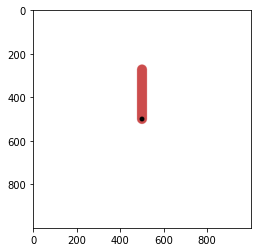

In [129]:
# create, initialize and reset the environment.
env = PendulumEnv()
env.seed(1)
obs = env.reset()

# episode trackers
done = False
episode_reward = 0
episode_obs = []
episode_action =[]
pid_info= {'proportional':[],'derivative':[]}
img = plt.imshow(env.render(mode='rgb_array')) # render window

# interact with the environment till termination.
while not done:
    # render
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # step
    action, action_info = pid.action(obs)
    next_obs, reward, done, _ = env.step(action)
    episode_reward += reward
    
    # store for plotting
    episode_obs.append(obs)
    episode_action.append(action)
    pid_info['proportional'].append(action_info['proportional'])
    pid_info['derivative'].append(action_info['derivative'])
    obs = next_obs
    

env.close()

In [130]:
print("Episode Score: {}".format(episode_reward))

Episode Score: -98.10086944432247


### `Plots`

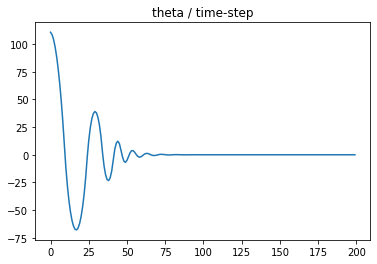

In [131]:
plt.plot(np.array(episode_obs).squeeze(1))
plt.title('theta / time-step')
plt.show()

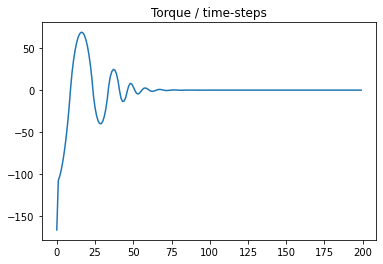

In [132]:
plt.plot(np.array(episode_action).squeeze(1))
plt.title('Torque / time-steps')
plt.show()

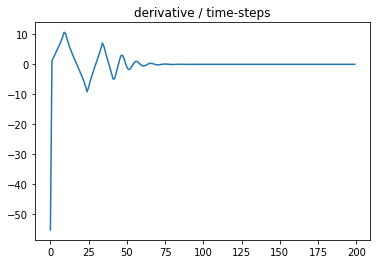

In [133]:
plt.plot(pid_info['derivative'])
plt.title('derivative / time-steps')
plt.show()

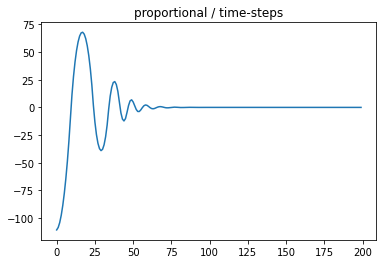

In [134]:
plt.plot(pid_info['proportional'])
plt.title('proportional / time-steps')
plt.show()